In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
file = np.load("data/ZFT_training_images_26k_iband_time_series_images_EPL.npz", allow_pickle = True)
file_full = np.load("./data/ZTF_training_images_26k_iband_image_properties_EPL.npz", allow_pickle = True)
print(file_full.files)

['data_labels', 'z_source_list', 'point_amp_list', 'abs_mag_ps_list', 'app_mag_ps_list', 'theta_E_list', 'PSF_list', 'colour_param', 'stretch_param', 'max_time_delay', 'z_lens_list', 'time_stamps', 'ra_source_list', 'dec_source_list', 'magnification_list']


In [18]:
print(file.files)

catalog = file['catalog_time_series']
coadd = file['images_single']
peaks = file['images_peak']
labels = file['data_labels']
times = file['time_stamps']

mags = file_full['app_mag_ps_list']



['catalog_time_series', 'images_single', 'images_peak', 'time_stamps', 'data_labels']


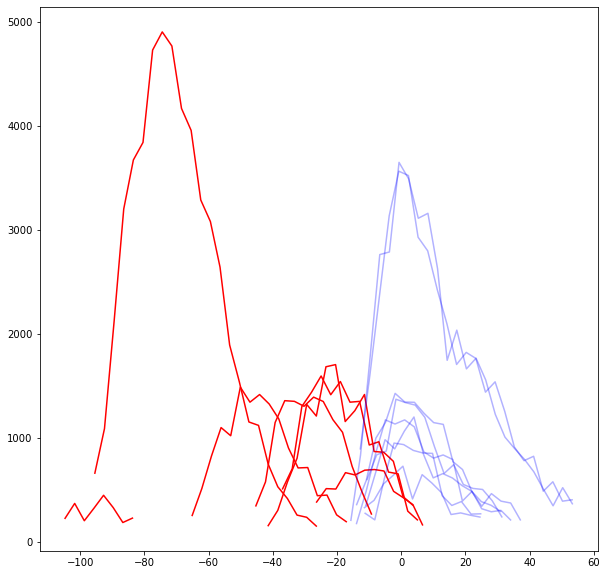

In [33]:
plt.figure(figsize = (10,10))
for indx, cat in enumerate(catalog[:50]):

    x_cat = []
    y_cat = []
    x2_cat = []
    y2_cat = []
    flux = []
    for c in cat:
        
        try:
            x_cat.append(*c['x'])
            y_cat.append(*c['y'])
            x2_cat.append(*c['x2'])
            y2_cat.append(*c['y2'])
            flux.append(*c['cflux'])
        except:
            x_cat.append(np.nanmean(x_cat))
            y_cat.append(np.nanmean(y_cat))
            x2_cat.append(None)
            y2_cat.append(None)
            flux.append(None)

    #plt.title(labels[indx])
    #plt.plot(np.array(x_cat), np.array(y_cat), 'o')
    #plt.show()
    #plt.plot( np.array(x2_cat), 'o')
    #plt.show()
    #plt.plot( np.array(y2_cat), 'o')
    #plt.show()
    #plt.plot(np.array(flux))
    #plt.show()
    if labels[indx][0] == 0:
        plt.plot(times[indx], flux, 'b', alpha = 0.3)
        #plt.plot(np.array(x_cat)-np.nanmean(x_cat), np.array(y_cat)-np.nanmean(y_cat), 'ob', alpha = 0.1)
        
    else:
        plt.plot(times[indx], flux, 'r')
        #plt.plot(np.array(x_cat)-np.nanmean(x_cat), np.array(y_cat)-np.nanmean(y_cat), 'or', alpha = 0.3)
#plt.xlim([-2,2])
#plt.ylim([-2, 2])

plt.show()